#  <center> <h1 style="color:#e39714">⚡ El sistema eléctrico en España ⚡</h1> </center>



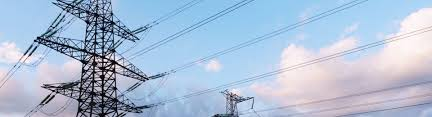

<h2 style="color:#e39714"> Índice </h2> </center>

<ol>
  <li> Tools.</li>
  <li>Introducción.</li>
  <li>Producción de energía en España en 2023.</li>
  <li>Energías renovables.</li>
    <ol>
      <li>Energía Hidráulica.</li>
      <li>Energía Solar: termosolar y  fotovoltaica.</li>
       <li>Energía Eólica: marina, terréstre, hidroeólica</li> 
      <li>Otras</li>
      <li>Conclusiones y comparación con otros años.</li>
    </ol>
  <li>Energías no renovables.</li>
    <ol>
      <li>Termoeléctrica: ciclo convencional y ciclo convinado.</li>
      <li>Nuclear</li>
      <li>Energía Eólica: marina, terréstre, hidroeólica</li>
      <li>Conclusiones y comparación con otros años.</li>
    </ol>
    
  <li>Distribución de la energía en España.</li>
  <li>Consumo de la energía en España:</li>
  <ol>
      <li>Análisis por finalidad.</li>
      <li>Análisis por comunidad.</li>
    </ol>
  <li>Objetivos del Plan Nacional de Energía y Clima 2023-2030.</li>
  <li>Bibliografía</li>
</ol>

<h2 style="color:#e39714"> 🧰 Tools: 🧰 </h2> </center>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

<h2 style="color:#e39714"> 2. Introducción </h2> </center>

La finalidad de este proyecto es hacer un barrido superficial de la producción y consumo de la energía en España.
Cabe destacar que en el proceso del análisis de producción no se incluyen los productos petrolíferos que son usados para el transporte convencional, pero si que se hará en el análisis del consumo.

En la siguiente imagen se puede observa como sería el total del consumo de energía en España incluyendo estos.
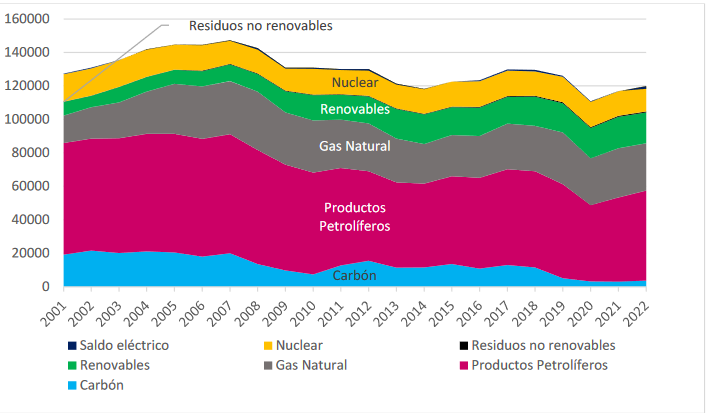

<h2 style="color:#e39714"> 3. Producción de energía en España en 2023. </h2> </center>

En la siguiente tabla podemos observar la producción de energía en España según el origen de la misma.
Para su mejor análisis se han eliminado algunas filas que incluian por ejemplo la importación y exportación de energía y que se analizará en otro momento.

In [2]:
data = pd.read_csv('2023.csv', encoding='latin-1')
produ =data.copy()

In [3]:
#Eliminamos las tres primeras filas que están vacías.
produ = produ.dropna()

#Convertimos la primera fila en el combre la columna.
nombres_columnas = produ.iloc[0]
produ.columns = nombres_columnas
produ = produ[1:]
produ.columns = [column.lower().replace(" ", "_") for column in produ.columns]

#Eliminamos las últimas filas.
produ= produ.head(20)

#Fijamos la primera columna como índice y la ponemos en snake case y minúscula
produ.set_index(produ.columns[0], inplace=True)
produ.columns = [column.lower().replace(" ", "_") for column in produ.columns]

#Previamente a pasarlo a Float reemplazamos algunos valores
produ = produ.replace(',', '.', regex=True)
produ = produ.replace('-', '0', regex=True)

#Pasamos a Float, añadimos la columna total y redondeamos
produ = produ.apply(pd.to_numeric, errors='coerce').astype(float)
produ['total'] = produ.sum(axis=1)
produ = produ.round(3)


In [4]:
produ.shape

(20, 13)

In [57]:
produ.head(3)

,ene/23,feb/23,mar/23,abr/23,may/23,jun/23,jul/23,ago/23,sep/23,oct/23,nov/23,dic/23,total
_,,,,,,,,,,,,,
Hidráulica,3859.363,2462.734,2043.477,1533.073,1391.615,1913.250,1303.374,966.922,929.922,1445.550,3449.672,3973.877,25272.829
Eólica,7457.302,4676.694,6693.387,4901.847,5462.643,3081.345,3860.256,4266.746,3596.793,5764.251,6995.357,5811.984,62568.604
Solar fotovoltaica,1744.409,2151.531,3094.570,3775.436,3860.483,3847.517,4552.258,4454.831,3361.511,2628.570,1994.694,1865.922,37331.732


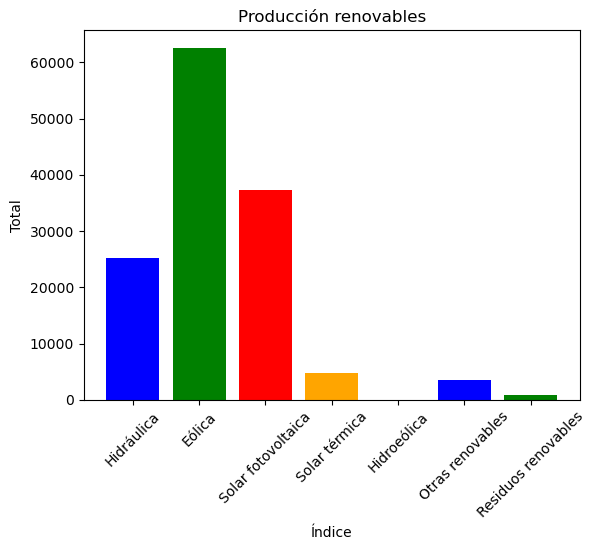

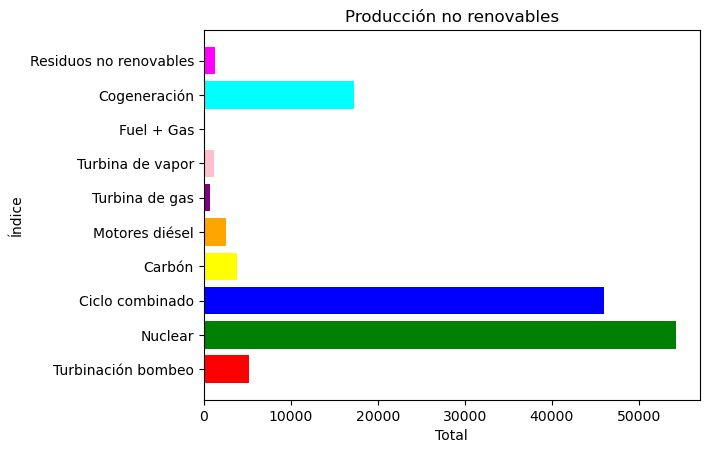

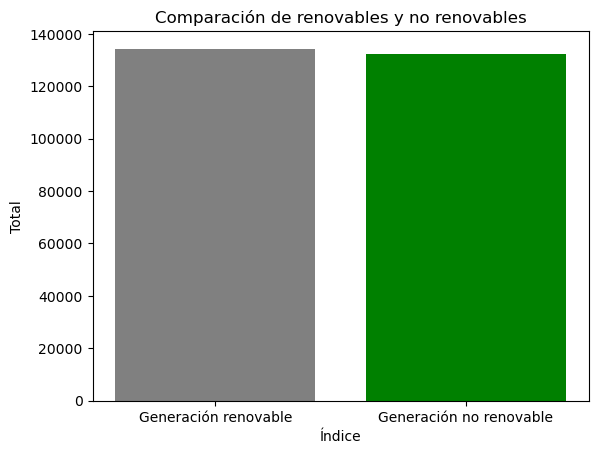

In [6]:
# Representaciones de producción
# 1. Renovables
reno = produ.head(7)
plt.bar(reno.index, reno['total'], color=['blue', 'green', 'red', 'orange', 'purple']) 

plt.xlabel('Índice')
plt.ylabel('Total')
plt.title('Producción renovables')

plt.xticks(rotation=45)

plt.show()

#2. No renovables
noreno = produ.iloc[8:18]
plt.barh(noreno.index, noreno['total'], color=['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'lime', 'teal', 'lavender', 'maroon', 'navy', 'olive', 'silver', 'black', 'white', 'gray'])  

plt.ylabel('Índice')  
plt.xlabel('Total')   
plt.title('Producción no renovables')

plt.show()
#3. Comparación
comparación = produ.loc[['Generación renovable', 'Generación no renovable']]

plt.bar(comparación.index, comparación['total'], color=['grey', 'green', 'red', 'orange', 'purple'])  

plt.xlabel('Índice')
plt.ylabel('Total')
plt.title('Comparación de renovables y no renovables')



plt.show()

<h2 style="color:#e39714"> 4. Energías renovables. </h2> </center>
<ol>
      <li>Energía Hidráulica.</li>
      <li>Energía Solar: termosolar y  fotovoltaica.</li>
       <li>Energía Eólica: marina, terréstre, hidroeólica</li> 
      <li>Otras</li>
      <li>Conclusiones y comparación con otros años.</li>
    </ol>

In [7]:
 #Seleccionamos solamente las energías renovables
reno2 = produ.head(8)
reno2

,ene/23,feb/23,mar/23,abr/23,may/23,jun/23,jul/23,ago/23,sep/23,oct/23,nov/23,dic/23,total
_,,,,,,,,,,,,,
Hidráulica,3859.363,2462.734,2043.477,1533.073,1391.615,1913.250,1303.374,966.922,929.922,1445.550,3449.672,3973.877,25272.829
Eólica,7457.302,4676.694,6693.387,4901.847,5462.643,3081.345,3860.256,4266.746,3596.793,5764.251,6995.357,5811.984,62568.604
Solar fotovoltaica,1744.409,2151.531,3094.570,3775.436,3860.483,3847.517,4552.258,4454.831,3361.511,2628.570,1994.694,1865.922,37331.732
Solar térmica,119.508,178.785,409.940,625.725,500.290,541.443,768.137,719.763,400.788,226.738,111.284,92.060,4694.460
Hidroeólica,1.650,0.829,1.572,1.573,2.067,0.809,2.759,2.700,1.315,0.443,1.090,0.669,17.477
Otras renovables,291.606,357.333,307.927,273.104,337.491,321.791,319.821,339.939,284.943,262.906,238.449,254.562,3589.872
Residuos renovables,68.129,71.962,72.255,57.927,45.424,81.084,83.521,77.316,73.649,76.525,63.523,74.726,846.040
Generación renovable,13541.967,9899.868,12623.128,11168.685,11600.013,9787.238,10890.126,10828.217,8648.920,10404.983,12854.069,12073.800,134321.014


<h2 style="color:#e39714"> 5. Energías no renovables. </h2> </center>
<ol>
      <li>Termoeléctrica: ciclo convencional y ciclo combinado.</li>
      <li>Nuclear</li>
      <li>Cogeneración</li>
          </ol>

<h3 style="color:#e39714"> 5.1 Termoeléctrica: ciclo convencional y ciclo combinado. </h3> </center>

<h3 style="color:#e39714"> 5.2 Nuclear. </h3> </center>

In [47]:
#Nuclear por Web scraping

r = requests.get('https://es.wikipedia.org/wiki/Anexo:Reactores_nucleares_de_Espa%C3%B1a')
html = r.content
soup = BeautifulSoup(html, 'html.parser')
soup.find_all('table', attrs={'class': 'wikitable sortable'})
html_table = soup.find_all('table', attrs={'class': 'wikitable sortable'})[0]
nuclear = pd.read_html(html_table.prettify())[0]

In [10]:
nuclear = nuclear.drop(['Unnamed: 8_level_0', 'Reactor','Potencia'], axis=1)

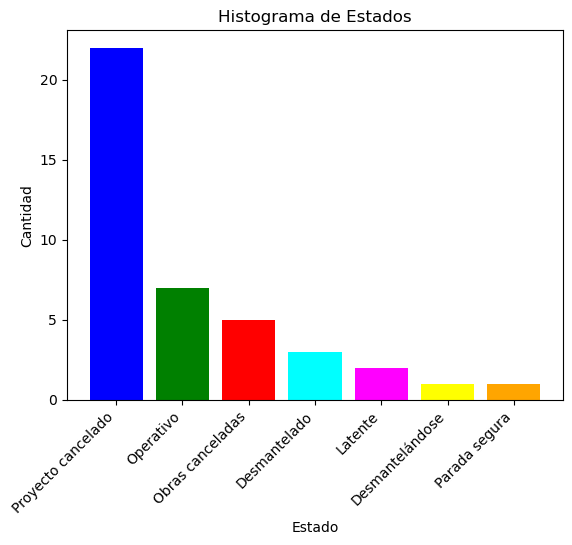

In [43]:
#3. situación de las nucleares
actual = nuclear['Unnamed: 9_level_0'].value_counts()
etiquetas = ['Proyecto cancelado', 'Operativo', 'Obras canceladas', 'Desmantelado', 'Latente', 'Desmantelándose', 'Parada segura']
colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange']

# Crear el histograma con colores diferentes para cada barra
plt.bar(etiquetas, actual, color=colores)

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.title('Centrales nucleares en España')

# Mostrar el histograma
plt.show()


<h3 style="color:#e39714"> 5.3 Cogeneración. </h3> </center>

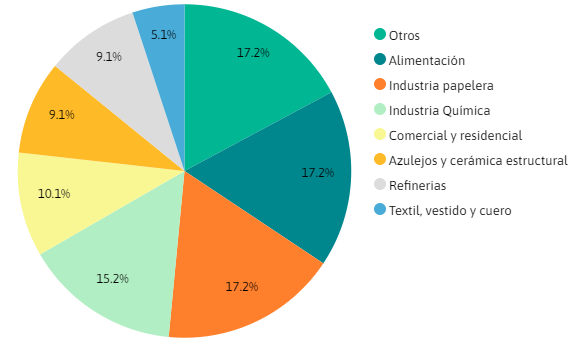

<h2 style="color:#e39714"> 6. Distribución de la energía en España. </h2> </center>

<h2 style="color:#e39714"> 7. Consumo de energía en España. </h2> </center>

Con el siguiente dataframe obtenemos una visión de cada uno de los sectores demandantes de energía y el tipo de energía que demandan cada uno de ellos.

<h3 style="color:#e39714"> 7.1 Consumo de energía en España por sectores. </h3> </center>

Aquí diferenciaremos entre el sector industrial, los transporte (donde si incluiremos los productos petrolíferos) y otros.

In [12]:
data2 = pd.read_excel('consumo2.xlsx')
con = data2.copy()


In [13]:
#Repetimos el proceso de preparación de la tabla
con.columns = [column.lower().replace(" ", "_") for column in con.columns]
con.set_index(con.columns[0], inplace=True)
con = con.apply(pd.to_numeric, errors='coerce').astype(float)
con = con.round(2)
con.isnull().sum()
con = con.fillna(0)

#Compartimentamos el dataframe para poder analizar cada uno de los sectores y presentar conclusiones.

El primer paso a tratar con estos datos es tener una vista general de donde se produce mayor gasto energético. Diferenciando entre industria, transporte y otros.

Text(0.5, 1.0, 'Comparación de consumo por sector')

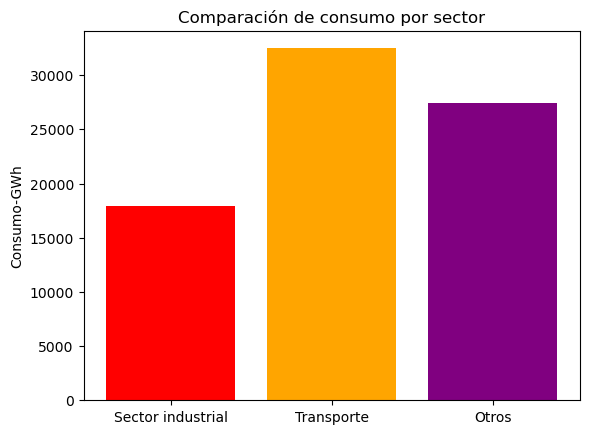

In [14]:
comparación = con.loc[['Sector industrial', 'Transporte', 'Otros']]
plt.bar(comparación.index, comparación['total'], color=['red', 'orange', 'purple'])  # Cambiar colores según necesites

plt.ylabel('Consumo-GWh')
plt.title('Comparación de consumo por sector')


Con este gráfico lo que podemos observar fácilmente es el poder que tiene aún los productos petrolíferos. Los gastos energéticos en carreteras son mayores que los otros sectores.

Aquí ya surge un motivo por que cual sería interesante favorecer la transición del transporte tradicional a otros medios más sostenibles. Dado que el petroleo y sus derivados corresponden al 62.7% de la producción de CO2.

2.3 kilogramos de CO2

In [15]:
con_industria = con.iloc[1:15]
con_industria = con_industria.drop(columns =['biodiésel_puro','geotérmica','carbón_vegetal','mezcla_biodiésel','residuo_urbano_no_renovable','residuos_urbanos_renovables','mezcla_biogasolina'])
con_transporte = con.iloc[15:-6]
con_transporte = con_transporte.drop(columns =['gas_de_coquería','gas_de_altos_hornos','combustibles_fósiles_sólidos','antracita','otros_carbones_bituminosos','coque_de_coquería','gases_manufacturados','otros_biocarburantes_líquidos','calor_ambiente_(bombas_de_calor)','residuos_no_renovables','residuos_industriales_(no_renovable)','residuo_urbano_no_renovable'])
con_otros = con.tail(6)
con_otros = con_otros.drop(columns =['gases_manufacturados','gas_de_coquería','gas_de_altos_hornos','biodiésel_puro','mezcla_biodiésel','otros_biocarburantes_líquidos','residuos_industriales_(no_renovable)'])

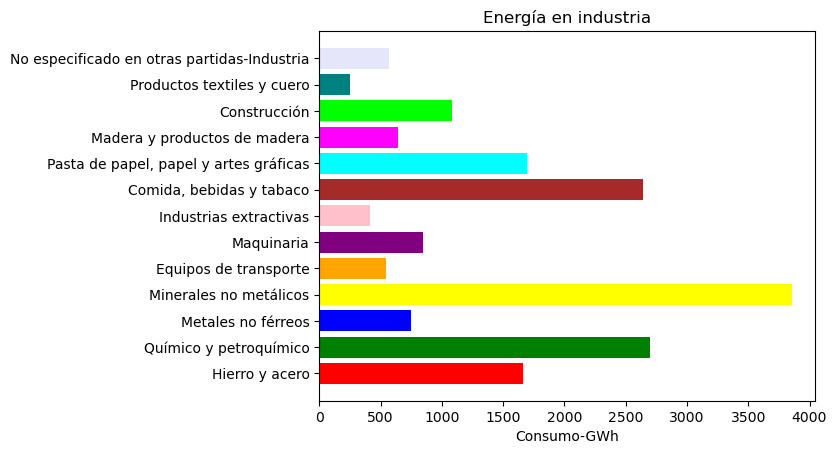

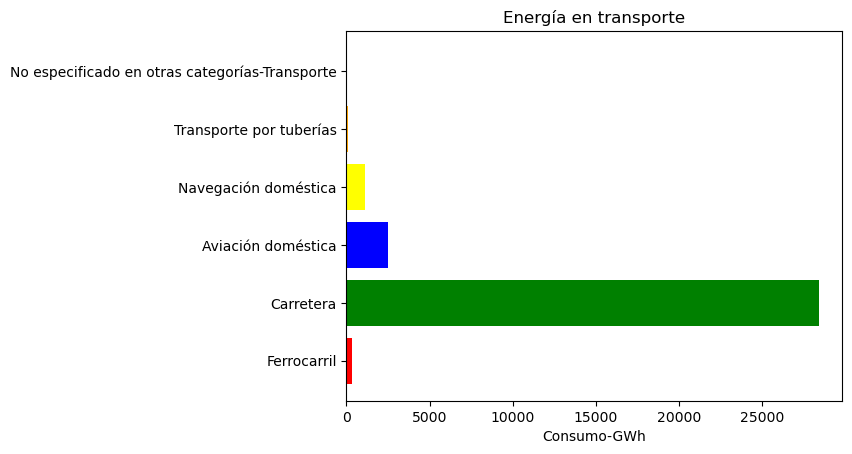

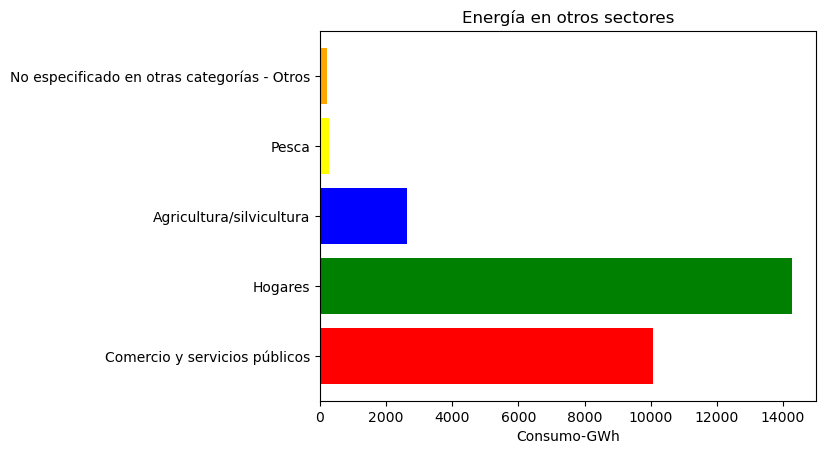

In [16]:
#Energía en industria
con_industria1 = con_industria.iloc[1:15]
plt.barh(con_industria1.index, con_industria1['total'], color=['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'lime', 'teal', 'lavender', 'maroon', 'navy', 'olive', 'silver', 'black', 'white', 'gray'])  
 
plt.xlabel('Consumo-GWh')   
plt.title('Energía en industria')
plt.show()

#Energía en transporte
con_transporte1 = con_transporte.iloc[1:7]
plt.barh(con_transporte1.index, con_transporte1['total'], color=['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'lime', 'teal', 'lavender', 'maroon', 'navy', 'olive', 'silver', 'black', 'white', 'gray'])  

plt.xlabel('Consumo-GWh')   
plt.title('Energía en transporte')
plt.show()
#Energía en otros sectores
con_otros1 = con_otros.iloc[1:6]
plt.barh(con_otros1.index, con_otros1['total'], color=['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'lime', 'teal', 'lavender', 'maroon', 'navy', 'olive', 'silver', 'black', 'white', 'gray'])  
 
plt.xlabel('Consumo-GWh')   
plt.title('Energía en otros sectores')
plt.show()

<h3 style="color:#e39714">7.2 Consumo de energía por Comunidad Autónoma </h3> </center>

In [17]:
data3 = pd.read_csv('data-5h38F.csv')

In [18]:

comunidad = data3
comunidad.loc[comunidad['Energía consumida'].str.contains('197 GWh', case=False, na=False), 'Energía consumida'] = '0.197'
comunidad.loc[comunidad['Energía consumida'].str.contains('205 GWh', case=False, na=False), 'Energía consumida'] = '0.205'

comunidad['Población'] = [8500187,1326315,2177701,585402,2372640,2053328,7792611,83117,6750336,664117,5097967,1054776,2690464,1176659,319892,85170,2208174,1004686,1531878]

comunidad['Energía consumida'] = comunidad['Energía consumida'].str.replace(' GWh', '').astype(float)

comunidad['Ratio-KWh'] = comunidad['Energía consumida']*1000000 / comunidad['Población']
comunidad['Ratio-KWh'] = comunidad['Ratio-KWh'].round(2)

comunidad.set_index(comunidad.columns[0], inplace=True)

In [19]:
comunidad

,Ratio generación-consumo,Energía generada,Energía consumida,Población,Ratio-KWh
Comunidad,,,,,
Andalucía,74.60%,29.586 GWh,39.634,8500187,4.66
Aragón,183.50%,19.218 GWh,10.471,1326315,7.89
Canarias,100%,8.061 GWh,8.061,2177701,3.70
Cantabria,42.30%,1.693 GWh,4.004,585402,6.84
Castilla y León,197.60%,27.016 GWh,13.670,2372640,5.76
Castilla-La Mancha,192.70%,23.129 GWh,12.004,2053328,5.85
Cataluña,89.20%,39.860 GWh,44.666,7792611,5.73
Ceuta,100%,197 GWh,0.197,83117,2.37
Comunidad de Madrid,4.90%,205 GWh,27.413,6750336,4.06


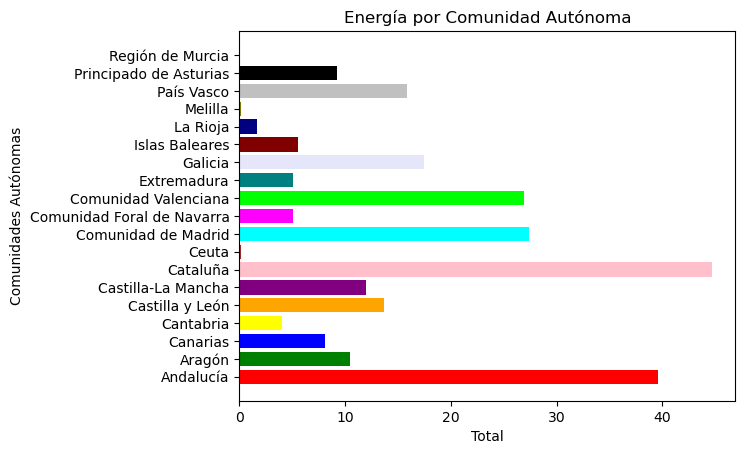

In [20]:
plt.barh(comunidad.index, comunidad['Energía consumida'], color=['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'lime', 'teal', 'lavender', 'maroon', 'navy', 'olive', 'silver', 'black', 'white', 'gray'])  
plt.ylabel('Comunidades Autónomas')  
plt.xlabel('Total')   
plt.title('Energía por Comunidad Autónoma')
plt.show()

<h2 style="color:#e39714">8.Objetivos del Plan Nacional de Energía y Clima 2023-2030 </h2> </center>

En este punto me gustaría revisar como están los Objetivos del Plan Nacional de Energía y Clima 2023-2030 y la posibilidad de cumplirlos desde la perspectiva de la energía.

El Ministerio para la Transición Energética y el Reto Demográfico ha publicado una propuesta de revisión del Plan Nacional Integrado de Energía y Clima (PNIEC) a 2030. El Plan definitivo deberá ser remitido a la Comisión Europea como tarde en junio de 2024.

Los objetivos para alcanzar la neutralidad en emisiones de carbono antes de 2050 de esta actualización del plan son más ambiciosos que los del plan anterior. Esta actualización del PNIEC 2023-2030 propone:
<ul>
  <li>7.1 Reducir las emisiones de gases de efecto invernadero un 32% en 2030 respecto 1990. Que suponía pasar de 287.710 millones de toneladas a 201.397.  El plan de 2020 proponía una reducción del 23 %</li>
  <li>7.2 Aumentar el peso de las renovables hasta el 48 % del consumo final de energía(antes el 42%) y generar el 81 % de la electricidad con energía renovable en 2030.</li>
  <li>7.3 Mejorar la eficiencia energética hasta el 44 % en términos de energía final, a razón de 1,5% anual 2021-2030.</li>
  <li>7.4 Reducir la dependencia energética hasta el 51% en 2030 (en 2019 la dependencia energética era del 73%)</li>
</ul>


<h3 style="color:#e39714">8.1 Reducir las emisiones de gases de efecto invernadero </h3> </center>

Para analizar este punto veremos en primer lugar de donde vienen esas producciones de CO2 y así poder hacer políticas de mejora.

In [21]:
datacont = {
    'Año': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Agricultura, ganadería, selvicultura y pesca': [44235.2, 44692.4, 44546.5, 44805.4, 43998.0, 44013.2, 46517.1, 46243.2, 46197.8, 46692.4, 46840.3, 46731.1, 47525.4, 47395.6, 44413.0],
    'Industrias extractivas': [5291.8, 4176.3, 4487.0, 2797.1, 2631.7, 2716.1, 2571.2, 1309.2, 1686.1, 1757.4, 1863.8, 1791.5, 1560.7, 1724.8, 1850.3],
    'Industria manufacturera': [107092.4, 90347.0, 92849.2, 88339.0, 86624.4, 82880.6, 81586.3, 81676.3, 82802.5, 82756.5, 83720.5, 81469.5, 75341.3, 79354.0, 74416.6],
    'Energía, agua y residuos': [109198.9, 94982.4, 76915.2, 91454.3, 96067.9, 75384.1, 78300.0, 89881.0, 74043.8, 83913.1, 74438.9, 58400.3, 44742.5, 44988.4, 55173.9],
    'Construcción': [3491.5, 3014.0, 2889.7, 2482.6, 2535.9, 2231.8, 2005.6, 1416.0, 1600.4, 1585.8, 1735.0, 1943.6, 1380.4, 1622.8, 1394.8],
    'Otros': [20460.1, 20096.1, 22207.4, 22377.9, 20502.4, 18512.7, 16817.9, 14634.7, 14851.8, 15289.3, 15468.2, 15259.2, 13700.5, 15380.5, 15067.0],
    'Transporte y almacenamiento': [46139.2, 41068.7, 40147.7, 38664.3, 35648.5, 34537.4, 34566.8, 37248.3, 39022.7, 41874.7, 42149.0, 43560.9, 31734.8, 37000.0, 43002.4],
    'Hogares': [80650.4, 78546.1, 78192.9, 71596.0, 67594.1, 68467.0, 68946.5, 71321.0, 72135.6, 71999.7, 73825.3, 72699.6, 61186.5, 67865.2, 69120.3]
}

co2 = pd.DataFrame(datacont)

In [22]:
codigo_insercion = """
<iframe id='ep-chart-ef7f95a6-c54f-4ea6-9285-cc03c648ceb2' src='https://www.epdata.es/embed/ef7f95a6-c54f-4ea6-9285-cc03c648ceb2/450' style='width: 100%; min-height: 450px; overflow: hidden;' frameborder='0' scrolling='no' height='450'></iframe>
"""

display(HTML(codigo_insercion))

Las <em><strong>cuatro fuentes principales son</strong></em>: cuatro fuentes principales son industra manufacturera, los hogares, el sector de la energía agua y residuos y el sector de los transporte.

Tradicionalmente se ha visto que para conseguir la compensación de las emisiones de CO2 en estos sectores tendremos que llevar a cabo de manera transversal políticas que favorezca de manera más rápida el aumento de la producción de energías limpias, la adaptación de la industria para que pueda recibir este tipo de energías (hay ciertas industrias cuya producción no se puede produccir en ocasiones sin gas o derivados).


La [completa transición](https://www.ree.es/es/datos/generacion/no-renovables-detalle-emisiones-CO2) energética supondría un ahorro aproximado de más de 32 millones de toneladas de CO2. Qudando más 50 millones de toneladas de compensar en otros sectores, aunque el aumento del transporte con vehículos eléctrico podría ser crucial para conseguir esta transición. 

La renovación del parque automovilístico es una importante herramienta para alcanzar los objetivos de reducción de emisiones y de mejora de la calidad del aire. Actualmente, un vehículo nuevo ha reducido en un 86% las emisiones de NOx y un 99% de partículas en comparación con un vehículo de más de 15 años. De igual modo, el desarrollo tecnológico y la incorporación de sistemas de ayuda en la conducción es un destacado factor para aumentar la seguridad vial con vehículos cada vez más seguros, más eficientes y cómodos.

En la Unión Europea, los vehículos eléctricos pasaron de una por cada 100 matriculaciones en 2018, a casi una por cada siete en 2022

<h3 style="color:#e39714">8.2 Aumentar el peso de las renovables hasta el 48 % del consumo final de energía(antes el 42%) y generar el 81 % de la electricidad con energía renovable en 2030.. </h3> </center>

En la siguiente imagen podemos observar que el proceso se esta realizando a buen ritmo en los últimos años. De hecho si siguiera así el ritmo de implantación de energía fotovoltaica se podría suplir solo con este tipo de energía en 10 años.

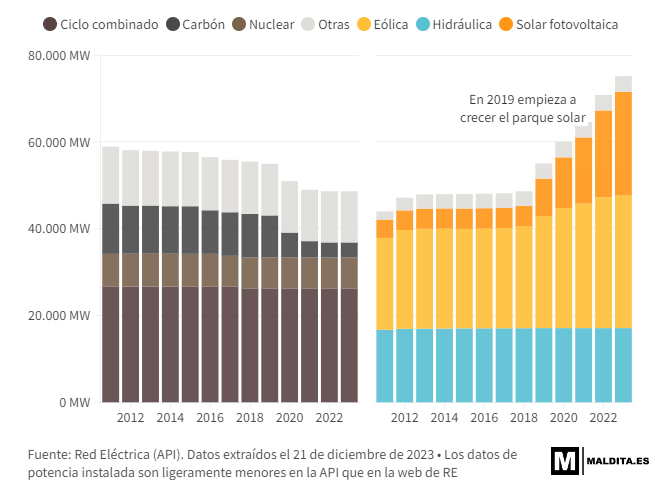


El problema reside en como afecta el cambio climático al aumento de la demanda de energía en verano, la caida de agua y por consiguiente de la producción de energía hidroeléctrica y el sector de los transportes.

<h3 style="color:#e39714">8.3 Mejorar la eficiencia energética hasta el 44 % en términos de energía final, a razón de 1,5% anual 2021-2030. </h3> </center>

Es un elemento que va más allá del análisis de la energía en sí ya que son acciones que repercuten en la forma de vida de las personas y otros procesos como es la construcción o los electrodomésticos que se utilizan en cada hogar.


<h3 style="color:#e39714">8.4 Reducir la dependencia energética hasta el 51% en 2030 (en 2019 la dependencia energética era del 73%) </h3> </center>

En este punto, el origen de los problemas recae otra vez en el petroleo y sus derivados. Pero vamos a omitir esto y centrarnos en las importaciones y exportaciones de electricidad en los últimos años.


In [23]:
comercio = data.copy()

comercio = comercio.dropna()

#Convertimos la primera fila en el combre la columna.
nombres_columnas = comercio.iloc[0]
comercio.columns = nombres_columnas
comercio = comercio[1:]
comercio.columns = [column.lower().replace(" ", "_") for column in comercio.columns]

comercio = comercio.tail(10)
comercio = comercio.head(8)
comercio.set_index(comercio.columns[0], inplace=True)

#Previamente a pasarlo a Float reemplazamos algunos valores
comercio = comercio.replace(',', '.', regex=True)
comercio = comercio.replace('-', '0', regex=True)

#Pasamos a Float, añadimos la columna total y redondeamos
comercio = comercio.apply(pd.to_numeric, errors='coerce').astype(float)

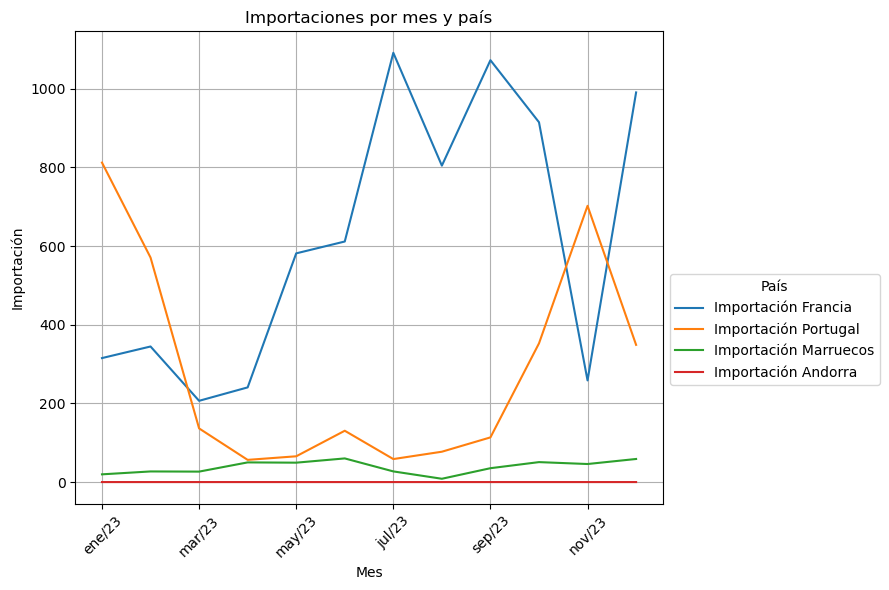

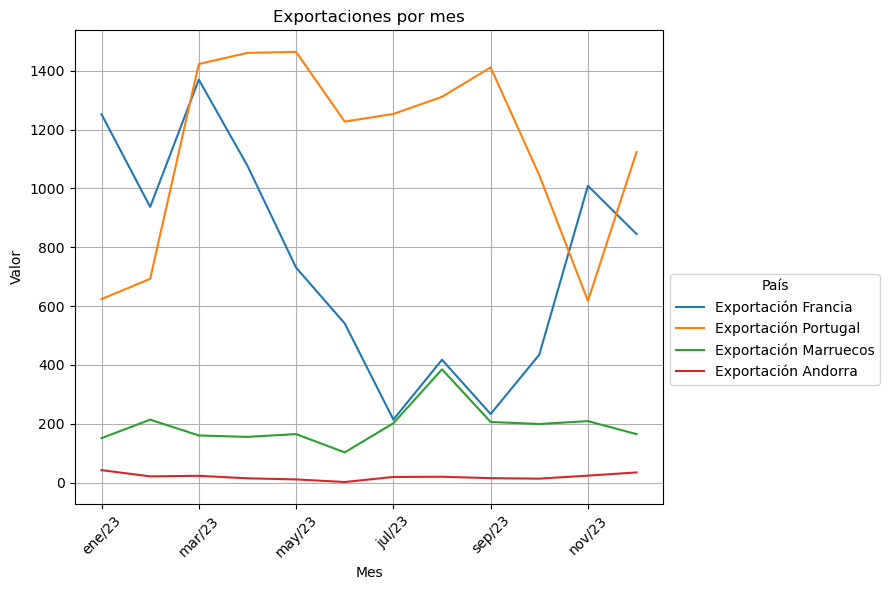

In [24]:
comercio
index1 = ["Importación Francia", "Importación Portugal", "Importación Marruecos", "Importación Andorra"]
importa = pd.DataFrame(comercio, index=index1)

# Transponer el DataFrame para intercambiar filas y columnas
df_transposed = importa.T

# Trazar el gráfico de líneas
df_transposed.plot(kind='line', figsize=(9, 6))
plt.title('Importaciones por mes y país')
plt.xlabel('Mes')
plt.ylabel('Importación')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='País',bbox_to_anchor=(1, 0.5), loc='upper left')
plt.tight_layout()
plt.show()


index = ["Importación Francia", "Importación Portugal", "Importación Marruecos", "Importación Andorra","Exportación Francia", "Exportación Portugal", "Exportación Marruecos", "Exportación Andorra"]
exporta = pd.DataFrame(comercio, index=index)

# Seleccionar las últimas cuatro filas del DataFrame
df_last_four = exporta.iloc[-4:]

# Transponer el DataFrame para intercambiar filas y columnas
df_transposed = df_last_four.T

# Trazar el gráfico de líneas
df_transposed.plot(kind='line', figsize=(9, 6))
plt.title('Exportaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='País',bbox_to_anchor=(1, 0.5), loc='upper left')
plt.tight_layout()
plt.show()

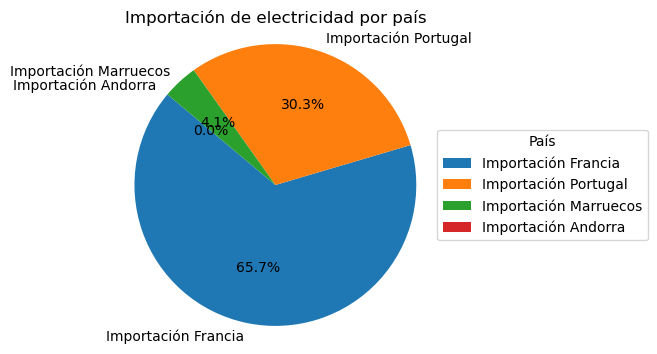

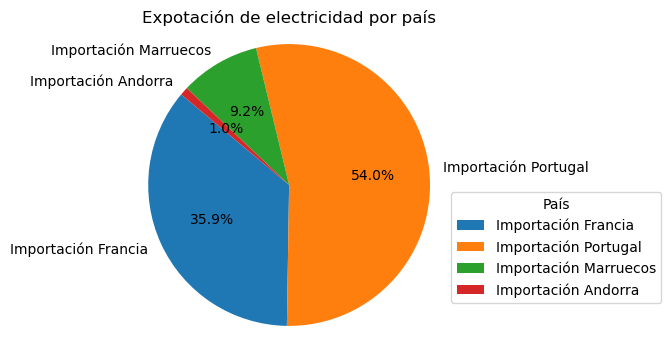

In [58]:
comercio['total'] = comercio.sum(axis=1)
comercio = comercio.round(4)

valores = comercio['total'].head(4)
etiquetas = comercio.index[:4]

# Trazar el gráfico de pastel
plt.figure(figsize=(4,4))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio asegura que el pastel sea circular
plt.title('Importación de electricidad por país')  # Título del gráfico
plt.legend(title='País', bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

valores2 = comercio['total'].tail(4)
etiquetas = comercio.index[:4]

# Trazar el gráfico de pastel
plt.figure(figsize=(4,4))
plt.pie(valores2, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio asegura que el pastel sea circular
plt.title('Expotación de electricidad por país')  # Título del gráfico
plt.legend(title='País', bbox_to_anchor=(1, 0.5), loc='upper left')
plt.show()

Hay un claro déficit productivo en los meses de verano, lo cual hace que se recurra a la importación de energía. La caida de la producción hidroeléctrica y que la solar no produce más con más calor (llegado a un punto produce incluso menos), nos muestra los puntos débiles de esta transición eléctrica.

Falta <em><strong>diversificación y cantidad</strong></em> para conseguir la deseada independencia eléctrica.

<h2 style="color:#e39714"> 9. Bibliografía. </h2> </center>

Objetivos energéticos: https://www.energiaysociedad.es/boletin/objetivos-de-la-politica-energetica-espanola-para-el-periodo-2023-2030/

Producción de CO2 de España: https://www.iea.org/countries/spain/emissions

Sectores productivos de CO2 en España: https://www.miteco.gob.es/content/dam/miteco/es/calidad-y-evaluacion-ambiental/temas/sistema-espanol-de-inventario-sei-/resumen_inventario_gei_ed_2023_tcm30-560383.pdf

Distribución de la energía en España: https://es.wikipedia.org/wiki/Mercado_el%C3%A9ctrico_de_Espa%C3%B1a

Plan de desarrollo de la energía eólica marina: https://www.miteco.gob.es/content/dam/miteco/es/prensa/211210hreolicamarinayenergiasdelmarenespana_tcm30-533945.pdf

La Cogeneración en España: https://www.acogen.es/la-cogeneracion-en-espana/